<a href="https://colab.research.google.com/github/dramirezbe/Signals-Systems-UN-DRB/blob/main/6_Serie_exponencial_y_geom%C3%A9trica_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Ejemplo

- Sea la señal:

\begin{equation}
x(t) = \begin{cases} A, & -T/2 \leq t < 0 \\ -A, & 0 \leq t < T/2 \end{cases}
\end{equation}

- Su espectro en serie de Fourier (compleja), se calcula como:

\begin{equation}
c_n = \frac{1}{T}\int^{T/2}_{-T/2}{x(t)e^{-jn\omega_o t}}dt=\frac{jA}{n\pi}(1-(-1)^n); \quad n\neq 0
\end{equation}

donde

\begin{equation}
c_0 = \frac{1}{T}\int^{T/2}_{-T/2}{x(t)}dt=0
\end{equation}
y

\begin{equation}
\hat{x}(t) = \sum\limits_{n=-N}^N{c_n e^{jn\omega_ot}}.
\end{equation}

Además, su espectro en serie de Fourier (trigonométrica) se calcula como:

\begin{equation}
a_n = \frac{2}{T}\int^{T/2}_{-T/2}{x(t)\cos(n\omega_o t)}dt=2\mathsf{Re}\{c_n\}= 0; \quad n > 0
\end{equation}
\begin{equation}
a_0 = c_0 = 0.
\end{equation}

\begin{equation}
b_n = \frac{2}{T}\int^{T/2}_{-T/2}{x(t)\sin(n\omega_o t)}dt=-2\mathsf{Im}\{c_n\}=\frac{2A}{n\pi}((-1)^n-1); \quad n > 0
\end{equation}
\begin{equation}
b_0 = 0.
\end{equation}

y:

\begin{equation}
\hat{x}(t) = a_0+\sum\limits_{n=1}^N{a_n \cos(n\omega_ot)+b_n\sin{n\omega_ot}}.
\end{equation}


Por otra parte, su espectro en serie de Fourier compacta se calcula como:

\begin{equation}
d_n = \sqrt{a_n^2+b_n^2} = 2|c_n| = \frac{2A}{n\pi}((-1)^n-1); \quad n > 0
\end{equation}
\begin{equation}
d_0 = a_0;  
\end{equation}

\begin{equation}
\phi_n = \tan^{-1}\left(\frac{\mathsf{Im}\{c_n\}}{\mathsf{Re}\{c_n\}}\right) = \tan^{-1}\left(\frac{-b_n}{a_n}\right); \quad n \geq 0
\end{equation}

- A continuación, se presentan las simulaciones respectivas.

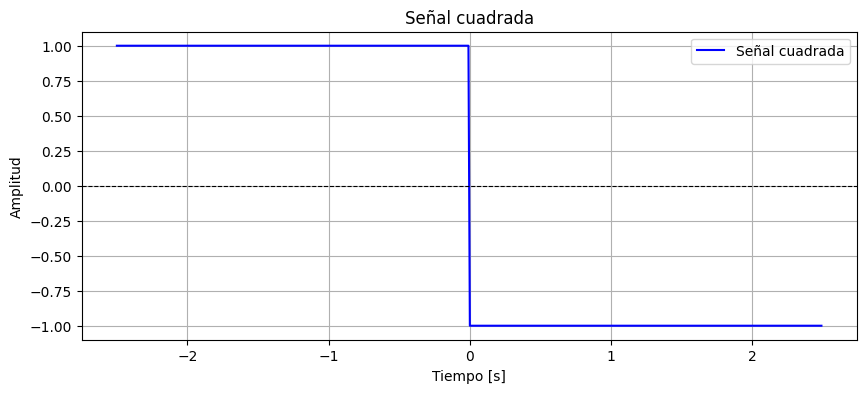

In [ ]:
A = 1 # amplitud de la señal
T = 5 # segundos de gráfica
Fs = 100 # frecuencia de muestreo definida
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas


# Generar la señal cuadrada
xo = np.concatenate((A*np.ones(int(Nm/2)), -A*np.ones(int(Nm/2))), axis=0) #Concatena un vector de unos con un vector de -unos

# Graficar la señal cuadrada
plt.figure(figsize=(10, 4))
plt.plot(tv, xo, label='Señal cuadrada', color='b')
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
plt.title("Señal cuadrada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
N = 10 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)#crear matriz para guardar bases (Numero muestras, 10 negativas + 10 positivas + 1 cero)
for n in range(-N,N+1,1): #Recorre todas las frecuencias positivas y negativas
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés (n+N porque python no admite posiciones negativas en una matriz)


nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = ((1j*A)/(nv*np.pi))*(1-(-1)**nv)
Cn[N] = 0 # nivel dc C_0


<ipython-input-26-3fefbdd5466d>:10: RuntimeWarning: divide by zero encountered in divide
  Cn = ((1j*A)/(nv*np.pi))*(1-(-1)**nv)
<ipython-input-26-3fefbdd5466d>:10: RuntimeWarning: invalid value encountered in divide
  Cn = ((1j*A)/(nv*np.pi))*(1-(-1)**nv)
<ipython-input-26-3fefbdd5466d>:10: RuntimeWarning: invalid value encountered in multiply
  Cn = ((1j*A)/(nv*np.pi))*(1-(-1)**nv)


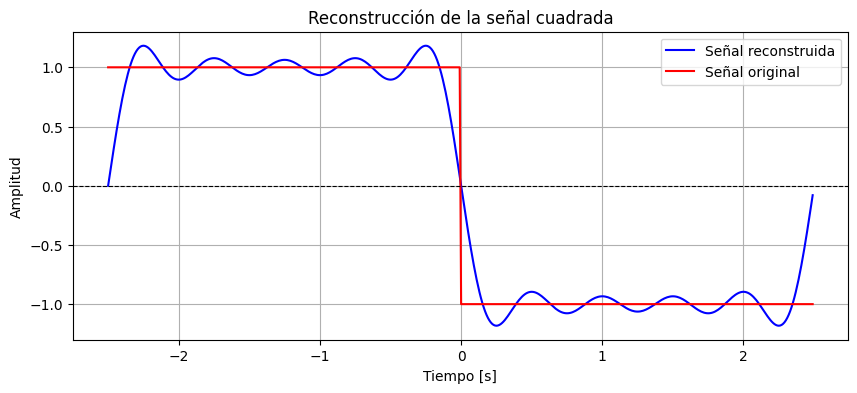

In [ ]:
# Reconstrucción de la señal
xo_reconstructed = np.real(phin @ Cn) #sumatoria de los Cn por los exp(jwont), para nuestro caso corresponde a una multiplicacion matricial entre nuestro vector Cn y nuestra matriz phin

# Gráfica de la señal reconstruida
plt.figure(figsize=(10, 4))
plt.plot(tv, xo_reconstructed, label='Señal reconstruida', color='b')
plt.plot(tv, xo, label='Señal original', color='r')
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
plt.title("Reconstrucción de la señal cuadrada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()

Ahora modular!

<ipython-input-29-800117280284>:12: RuntimeWarning: divide by zero encountered in divide
  Cn = ((1j * A) / (nv * np.pi)) * (1 - (-1) ** nv)  # Coeficientes Fourier
<ipython-input-29-800117280284>:12: RuntimeWarning: invalid value encountered in divide
  Cn = ((1j * A) / (nv * np.pi)) * (1 - (-1) ** nv)  # Coeficientes Fourier
<ipython-input-29-800117280284>:12: RuntimeWarning: invalid value encountered in multiply
  Cn = ((1j * A) / (nv * np.pi)) * (1 - (-1) ** nv)  # Coeficientes Fourier


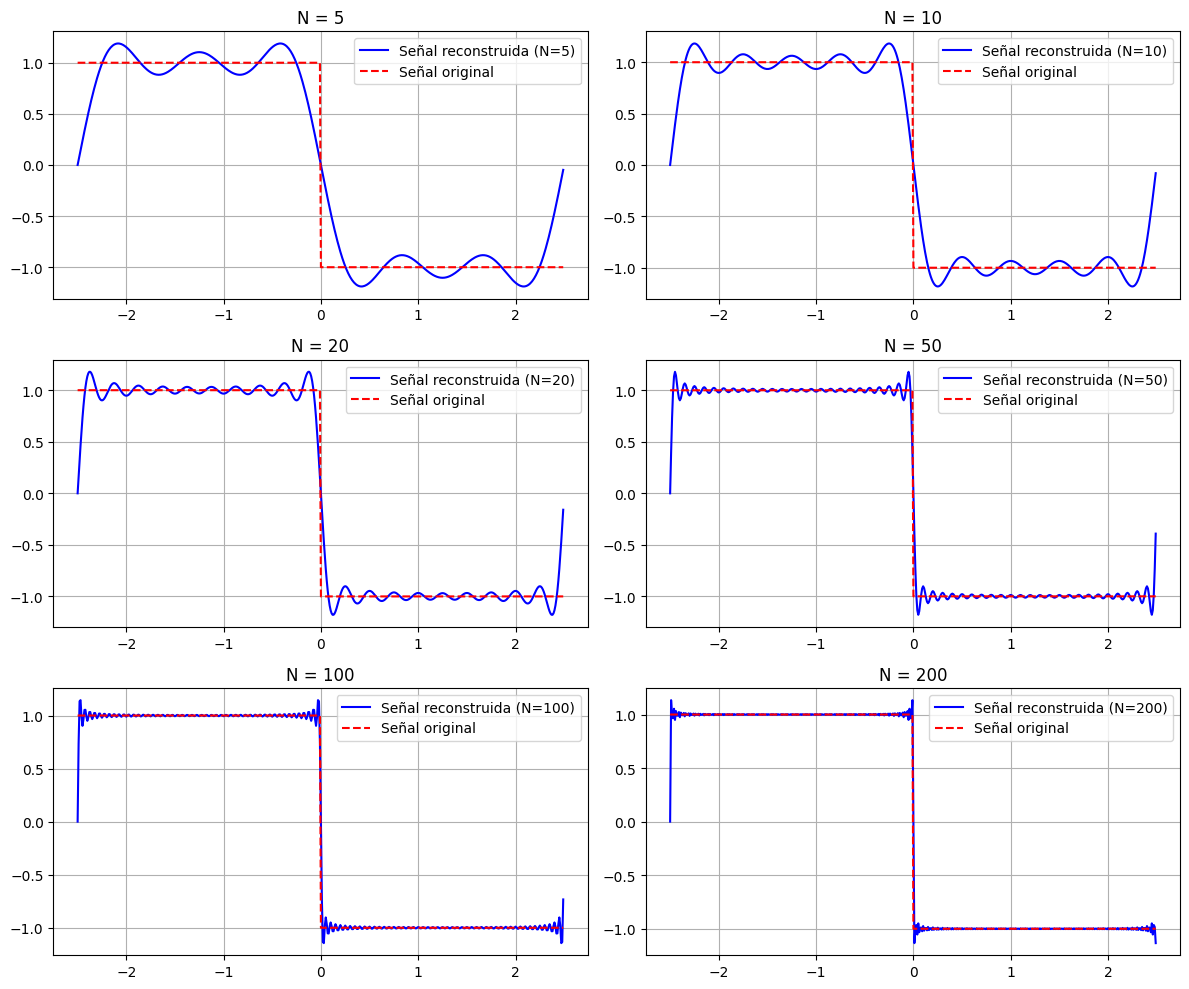

In [ ]:
def complex_fourier_series(A, T, Fs, N):
    wo = 2 * np.pi / T  # frecuencia fundamental
    tv = np.arange(-T / 2, T / 2, 1 / Fs)  # vector de tiempo generado
    Nm = len(tv)  # numero de muestras requeridas
    xo = np.concatenate((A * np.ones(int(Nm / 2)), -A * np.ones(int(Nm / 2))), axis=0)  # Señal original

    phin = np.zeros((Nm, 2 * N + 1), dtype=np.complex_)  # matriz para guardar bases de Fourier
    for n in range(-N, N + 1):  # Recorre frecuencias positivas y negativas
        phin[:, n + N] = np.exp(1j * n * wo * tv)  # Base de Fourier (n + N ajusta el índice)

    nv = np.linspace(-N, N, 2 * N + 1)  # vector de números armónicos
    Cn = ((1j * A) / (nv * np.pi)) * (1 - (-1) ** nv)  # Coeficientes Fourier
    Cn[N] = 0  # Nivel DC (C_0)

    return tv, xo, np.real(phin @ Cn)  # Señal original y reconstruida

# Parámetros generales
Nvector = [5, 10, 20, 50, 100, 200]  # Número de armónicos
A = 1  # Amplitud de la señal
T = 5  # Periodo de la señal
Fs = 100  # Frecuencia de muestreo

# Crear subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))  # 3 filas, 2 columnas
axs = axs.flatten()  # Para recorrer los ejes más fácilmente

for i, N in enumerate(Nvector):
    tv, xo, xo_reconstructed = complex_fourier_series(A, T, Fs, N)
    axs[i].plot(tv, xo_reconstructed, label=f'Señal reconstruida (N={N})', color='b')
    axs[i].plot(tv, xo, label='Señal original', color='r', linestyle='dashed')
    axs[i].set_title(f'N = {N}')
    axs[i].legend()
    axs[i].grid(True)

# Ajustar el diseño del subplot
plt.tight_layout()
plt.show()

# Serie Geométrica

Además, su espectro en serie de Fourier (trigonométrica) se calcula como:

\begin{equation}
a_n = \frac{2}{T}\int^{T/2}_{-T/2}{x(t)\cos(n\omega_o t)}dt=2\mathsf{Re}\{c_n\}= 0; \quad n > 0
\end{equation}
\begin{equation}
a_0 = c_0 = 0.
\end{equation}

\begin{equation}
b_n = \frac{2}{T}\int^{T/2}_{-T/2}{x(t)\sin(n\omega_o t)}dt=-2\mathsf{Im}\{c_n\}=\frac{2A}{n\pi}((-1)^n-1); \quad n > 0
\end{equation}
\begin{equation}
b_0 = 0.
\end{equation}

y:

\begin{equation}
\hat{x}(t) = a_0+\sum\limits_{n=1}^N{a_n \cos(n\omega_ot)+b_n\sin{n\omega_ot}}.
\end{equation}


In [ ]:
A = 1 # amplitud de la señal
T = 5 # segundos de gráfica
Fs = 100 # frecuencia de muestreo definida
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas


# Generar la señal cuadrada
xo = np.concatenate((A*np.ones(int(Nm/2)), -A*np.ones(int(Nm/2))), axis=0) #Concatena un vector de unos con un vector de -unos


<ipython-input-22-919fa25a3269>:3: RuntimeWarning: divide by zero encountered in divide
  Cn = (1j * A / (nv * np.pi)) * (1 - np.exp(1j * np.pi * nv)) / 2
<ipython-input-22-919fa25a3269>:3: RuntimeWarning: invalid value encountered in divide
  Cn = (1j * A / (nv * np.pi)) * (1 - np.exp(1j * np.pi * nv)) / 2
<ipython-input-22-919fa25a3269>:3: RuntimeWarning: invalid value encountered in multiply
  Cn = (1j * A / (nv * np.pi)) * (1 - np.exp(1j * np.pi * nv)) / 2


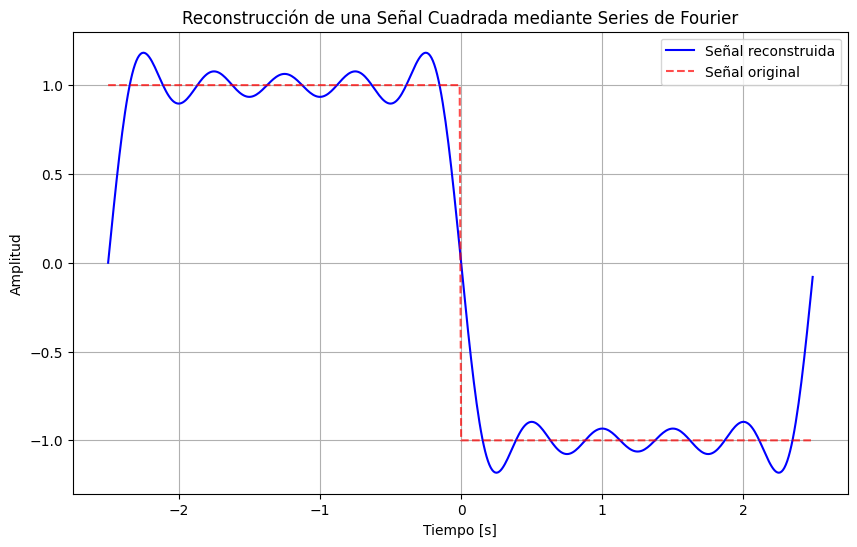

In [ ]:
# Cálculo de coeficientes de Fourier
nv = np.arange(-N, N + 1)  # Índices de Fourier
Cn = (1j * A / (nv * np.pi)) * (1 - np.exp(1j * np.pi * nv)) / 2
Cn[N] = 0  # Ajuste para el término DC


an = 2 * np.real(Cn)  # Coeficientes de coseno
ao = np.real(Cn[N])   # Término DC
bn = -2 * np.imag(Cn)  # Coeficientes de seno

# Reconstrucción de la señal
xo_reconstructed = ao + np.sum(
    [an[k + N] * np.cos(k * wo * tv) + bn[k + N] * np.sin(k * wo * tv) for k in range(-N, N + 1)],
    axis=0
)

# Gráfica de la señal
plt.figure(figsize=(10, 6))
plt.plot(tv, xo_reconstructed, label='Señal reconstruida', color='b')
plt.plot(tv, xo, label='Señal original', color='r', linestyle='dashed', alpha=0.7)
plt.title('Reconstrucción de una Señal Cuadrada mediante Series de Fourier')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()